In [1]:
from Module_20220302 import *

In [2]:
equation = equations_NGE_and_F
file_label = 3

## Create a list of FGF values for bifurvation plot

In [3]:
## Bifurcation plots, Nanog/Gata vs FGF
#Creat a list of FGF where we will evaluate our system, i..e get var1(tmax) and var2(tmac) with given ic.
FGF_list = []
FGF_list = np.logspace(lin_to_log(0.3),lin_to_log(2.5),50, base = 2 )# do log-spaced FGF, 

# Scan initial conditions  and see where they end up after tmax
Pick rnadom Nanog and Gata, with some fixed EssrB,  randomly form loguniform
and generate a table with the values of our variables at `tmax` at each value of FGF and IC.

In [4]:
# this is so that the module is reloaded , otherwise updates in the module are not read in
%load_ext autoreload
%autoreload

In [5]:
tmax = 200 # when to stop the ODE integration
N_ics = 2000 #number of initial ocnditions to scan
ic_range = [0.01,17]# the [min,max] specyifing hte range for values to be picked for Gata/Nanog/ESSRB, i.e. randomly from a cube

table_all_ic = []
fname = str(file_label) + '_table_all_ic_NGE_nics' + str(N_ics) + '_tmax' + str(tmax) + '.txt'# make a string that will be our file name

try:# try to load from file
    table_all_ic = np.loadtxt(fname)
    print("Loading from file", fname)
except:#if loading failed, e.g. file does not exist, then generate and save new
    print("did not find file, generating new table_all_ic")
    ics = generate_ic_to_scan_random(ic_range=ic_range, N_points = N_ics)# here we can make the table of initial conditions as we want, e.g. to test the "biologicla" ones we outlined
    #print(np.shape(ics))
    #print(ics)
    table_all_ic = scan_ic_v2(parameters, equation, FGF_list, ics, tmax)# alal consider saving this table into a file, so that we can un once and analyze after
    np.savetxt(fname, table_all_ic)
print(np.shape(table_all_ic))

Loading from file 3_table_all_ic_NGE_nics2000_tmax200.txt
(100000, 7)


## Bifurcation plot 


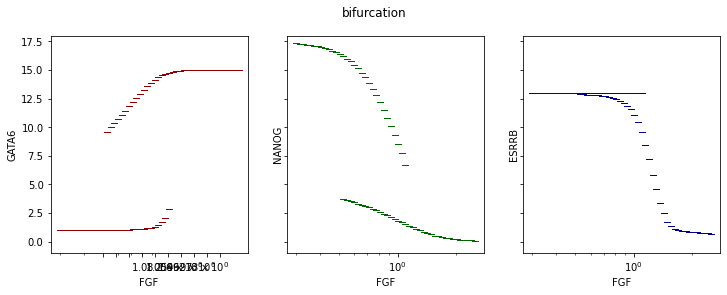

In [6]:
plot_bifurcation_v4(table_all_ic, file_label = file_label)